# Question 2

For this question I had to replicate the week 7 exercise but using the new ML method for binned data 
$$ \ln L (v_0, k) = \sum_{i=1}^N (n_i ln v_i - v_i) $$
Which was implemented in the third function of the code (L). 
For the first question it was as simple as implementing the new function like in week 7. To find the uncertainty the graphical method was used like previously. 


For part ii I now used scipy.optimize.minimize to minimize the negative function using the Nelder-Mead method. This was used to help with precision problems encountered if you use the default method. Unfortunately I was unable to determine the error this way graphically as I was unsure how to do it used the minimization function. 


For part iii I used an uncertainties module (pip install --upgrade uncertainties) to calculate the error propagation on R through the error calculated in part i. 

## Final Results 

Part i: 
$$ k = 1.1802 +/- 0.0243 e-23 \frac{m^2 kg}{ s^{2} K} $$
\
Part ii:
$$ k = 1.1804e-23 \frac{m^2 kg}{ s^{2} K} $$
$$ v_0 = 1.8799e+03 $$

\
Part iii:
$$ N_a = (7.04+/-0.14)e+23 mol^{-1} $$

## Comments

The results gained are fairly close to the known constants for Boltzmanns constant and Avogadro's number, however they are not within the error bounds which is interesting. For this question you had to pay particular attention to the units. I was unsure how the method was suppose to differ for part ii. I understand you vary both k and v_0 but how to implement this without 2 dimensional minimization I was unsure. I would also like to know how to determine the uncertainty graphically for part ii. Numerically this is simple but was unsure graphically using scipy. 

All in SI units
-------
Actually k: 1.38064852e-23
Estimated k (Using ML Method for binned data): 1.1802e-23
ln L_max = 22020.138781
k = 1.1802e-23 (Ordinary ML method)
delta +, k= 2.4282e-25
delta -, k= 2.5323e-25
[1.15591559e-23] [1.15487549e-23]

----------------
Part (ii):

k= 1.1804e-23
v_0 = 1.8799e+03

------------
Part iii:

Avogadros number with uncertainty using k from i= (7.04+/-0.14)e+23
7.044580536912752e+23
R / k_const = 6.0218e+23
Actual N_a = 6.0221e+23


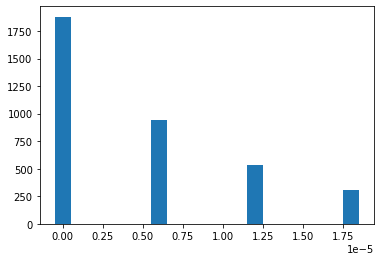

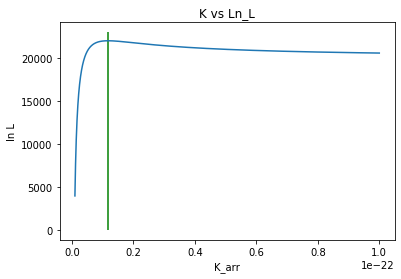

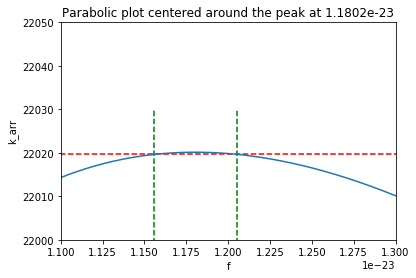

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
from uncertainties import ufloat

#functions

def gp_energy(z, r, delta_rho, g): #gravitational potential energy of a spherical cluster 
    return 4*np.pi * r**3 * delta_rho * g * z / 3


def poisson(mean_0, z, r, delta_rho, g, k, T): #poisson distribution for random var z
    return v_0 * np.exp(-gp_energy(z, r, delta_rho, g) / (k*T))


def L(k, mean_0, z, n, r, delta_rho, g, T): #ML binned method
    mean_i = poisson(v_0, z, r, delta_rho, g, k, T)
    
    return np.sum(n * (np.log(v_0) - gp_energy(z, r, delta_rho, g) / (k*T)) - mean_i)


#init

g = 9.80 #ms/s^2. Says in question 9.80. More accurate result if 9.81 used.
k_const = 1.38064852e-23  # m^2 kg s^-2 K^-1. True boltzmann constant in Si units
r = 0.52e-6 #radius of spheres in meters
rho_mastic = 1063  # kg/m^3
rho_water = 1000  # kg/m^3 approx density of water 
delta_rho = rho_mastic - rho_water
T = 293  # K
focus_thickness = 1e-6  # m
N_bins = 4
R = 8.314


#data input
z = np.array([0, 6, 12, 18])*1e-6 #height, z, in meters
n = np.array([1880, 940, 530, 305]) #no. clusters 

v_0 = n[0] #v_0 = n(z=0) = 1880

plt.figure()
plt.bar(z, n, focus_thickness)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

k_arr = np.linspace(1e-24, 1e-22, 10000)
ln_L = np.zeros(10000)
for i in range(k_arr.size):
    ln_L[i] = L(k_arr[i], v_0, z, n, r, delta_rho, g, T)
k_est = k_arr[ln_L_arr.argmax()]
print('All in SI units')
print('-------')
print("Actually k:", k_const)
print("Estimated k (Using ML Method for binned data): %1.4e" %k_est)

plt.figure()
plt.plot(k_arr,ln_L)
plt.xlabel('K_arr')
plt.ylabel('ln L')
plt.title('K vs Ln_L')
plt.vlines(k_arr[np.where(ln_L==np.max(ln_L))], 0, 23000, color='green', linestyle='solid')

print('ln L_max = %f' %np.max(ln_L))
print('k = %1.4e (Ordinary ML method)' %k_arr[np.where(ln_L==np.max(ln_L))])

sigma_ln_L = np.max(ln_L) - 0.5
#print('ln L_max_20 - 0.5 = %f' %sigma_ln_L)

k_unc = np.linspace(0.1e-22,0.2e-22,10000)
ln_L_unc = np.zeros(10000)
for i in range(k_unc.size):
    ln_L_unc[i] = L(k_unc[i], v_0, z, n, r, delta_rho, g, T)
    
plt.figure()
plt.plot(k_unc,ln_L_unc)
plt.xlabel('f')
plt.ylabel('k_arr')
plt.ylim((22000,22050))
plt.xlim((1.1e-23, 1.3e-23))
plt.title('Parabolic plot centered around the peak at %1.4e' %k_arr[np.where(ln_L==np.max(ln_L))])


plt.hlines(sigma_ln_L, 0.1e-22,0.2e-22, color='red', linestyle='dashed')
idx_f20 = np.argwhere(np.diff(np.sign(ln_L_unc - sigma_ln_L))).flatten()
#print(idx_f20)
#[1559 2055]
plt.vlines(k_unc[1559], 21800, 22030, color='green', linestyle='dashed')
plt.vlines(k_unc[2055], 21800, 22030, color='green', linestyle='dashed')

delta_plus_k = k_arr[np.where(ln_L==np.max(ln_L))] - k_unc[1559]
delta_minus_k = k_unc[2055]- k_arr[np.where(ln_L==np.max(ln_L))]

print('delta +, k= %1.4e' %delta_plus_k) #biggest
print('delta -, k= %1.4e' %delta_minus_k)
print(np.abs(k_est-delta_plus_k),np.abs(k_est-delta_minus_k))

print('\n----------------')
print('Part (ii):\n')

sol = scipy.optimize.minimize((lambda x, *args: -L(x[0], x[1], *args)),
    x0=np.array([k_est, v_0], dtype=np.longdouble),
    args=(z.astype(np.longdouble), n.astype(np.longdouble), r, delta_rho, g, T),
    method="Nelder-Mead")
print('k= %1.4e' %sol.x[0])
print('v_0 = %1.4e' %sol.x[1])




print('\n------------')
print('Part iii:\n')

N_a_actual = R / k_const
N_a_est_i = R / k_est
N_a_est_ii = R / sol.x[0]

w = ufloat(k_est, delta_plus_k)
print('Avogadros number with uncertainty using k from i=', R/w)
print(N_a_est_i)
print('R / k_const = %1.4e' %N_a_actual)
print('Actual N_a = %1.4e' %6.0221409e+23)

In [69]:
#alternative way for part i

sol = scipy.optimize.minimize((lambda *args: -L(*args)),x0=np.array([k_est], dtype=np.longdouble),
                              args=(v_0, z.astype(np.longdouble), n.astype(np.longdouble), r, delta_rho, g, T),
                              method="Nelder-Mead")

print(sol)

 final_simplex: (array([[1.18019802e-23],
       [1.18065903e-23]]), array([-22020.13878135, -22020.13874097]))
           fun: -22020.138781348152
       message: 'Optimization terminated successfully.'
          nfev: 16
           nit: 8
        status: 0
       success: True
             x: array([1.18019802e-23])
